In [1]:
import train_embeddings
import matplotlib.pyplot as plt
import sentence_features
import pickle
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
word2vec_path = "../data/models/word2vec/word2vecGensim_sw.bin"
word2vec = train_embeddings.load_word2vec_model(word2vec_path)
mapped_reports_path = "../data/processed/processed_reports/preprocessed_replace_sw"
# mapped_reports_path = "../data/processed/preprocessed_findings_replace_sw"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))

In [3]:
pipeline = make_pipeline(train_embeddings.WordVectorizer(word2vec), sentence_features.ReportVectorAverager(granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)
#data = pipeline.transform(mapped_reports)

In [4]:
split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([27794, 17011]))
(array([0, 1]), array([6958, 4244]))


In [5]:
sgd_clf = SGDClassifier()
clf = sentence_features.SentenceBasedClassifier(sgd_clf)
clf.fit(trainingX, trainingY)

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


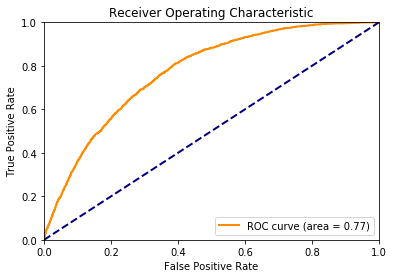

In [6]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Now try FastText
fastText_path = "../data/models/fastText/fastText_sw.bin"
ft = train_embeddings.load_fastText_model(fastText_path)

In [8]:
pipeline = make_pipeline(train_embeddings.FastTextReportVectorizer(ft, granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([27789, 17029]))
(array([0, 1]), array([6979, 4226]))


In [9]:
sgd_clf = SGDClassifier()
clf = sentence_features.SentenceBasedClassifier(sgd_clf)
clf.fit(trainingX, trainingY)

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


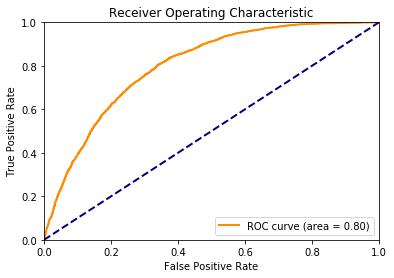

In [10]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
# KNN for fastText
knn_clf = KNeighborsClassifier(n_neighbors=)
clf = sentence_features.SentenceBasedClassifier(knn_clf, use_prob_func=True)
clf.fit(trainingX, trainingY)

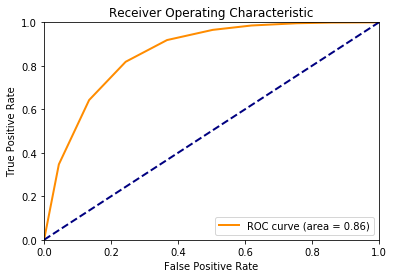

In [12]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
# KNN with Top 3 for fastText
knn_clf = KNeighborsClassifier(n_neighbors=9)
clf = sentence_features.SentenceBasedClassifier(knn_clf, use_prob_func=True, combiner=lambda confs : sum(sorted(confs)[-4:]) / 4)
clf.fit(trainingX, trainingY)

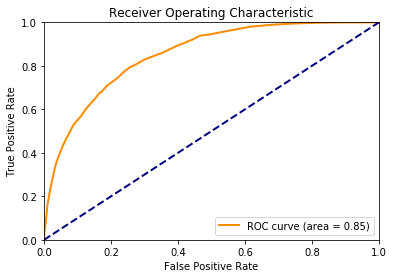

In [20]:
y_score = clf.decision_function(testingX)

fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()